# Cotton Plant Classification

The below code is to avoid GPU Overflows.

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
testAddress = 'val'
trainAddress = 'train'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        rescale=1./255)

trainSet = train_datagen.flow_from_directory(
    trainAddress,
    batch_size=32,
    target_size=(299, 299),
)

testSet = test_datagen.flow_from_directory(
    testAddress,
    batch_size=32,
    target_size=(299, 299),
)

Found 1929 images belonging to 4 classes.
Found 324 images belonging to 4 classes.


In [3]:
# Let's import the Inception
from tensorflow.keras.applications import InceptionV3
inception = InceptionV3(input_shape=[299, 299, 3], weights='imagenet', include_top=False)

In [4]:
# In Order to use pre trained weights
for layer in inception.layers:
    layer.trainable = False

In [5]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
x = Flatten()(inception.output)
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [7]:
# We created the model let's train
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [8]:
r = model.fit_generator(
  trainSet,
  validation_data=testSet,
  epochs=20,
  steps_per_epoch=len(trainSet),
  validation_steps=len(testSet)
)

C:\Users\bhanu\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 48s 682ms/step - loss: 9.0353 - accuracy: 0.5974 - val_loss: 1.0133 - val_accuracy: 0.9105
Epoch 2/20
61/61 [==============================] - 38s 626ms/step - loss: 1.2271 - accuracy: 0.8927 - val_loss: 1.0805 - val_accuracy: 0.9167
Epoch 3/20
61/61 [==============================] - 39s 635ms/step - loss: 0.7460 - accuracy: 0.9254 - val_loss: 0.8569 - val_accuracy: 0.9352
Epoch 4/20
61/61 [==============================] - 39s 637ms/step - loss: 0.7832 - accuracy: 0.9372 - val_loss: 0.5952 - val_accuracy: 0.9414
Epoch 5/20
61/61 [==============================] - 39s 648ms/step - loss: 0.9360 - accuracy: 0.9192 - val_loss: 1.6053 - val_accuracy: 0.8920
Epoch 6/20
61/61 [==============================] - 39s 638ms/step - loss: 0.7058 - accuracy: 0.9448 - val_loss: 0.9265 - val_accuracy: 0.9383
Epoch 7/20
61/61 [==============================] - 40s 653ms/step - loss: 0.8822 - accuracy: 0.9518 - val_loss: 1.0819 - val_accuracy: 0.9475

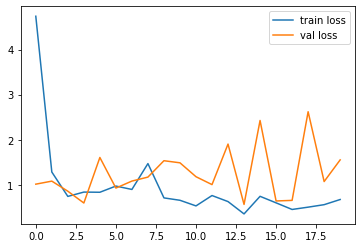

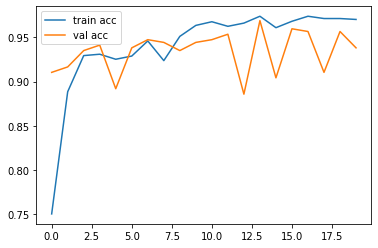

<Figure size 432x288 with 0 Axes>

In [9]:

# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Let's see the test results

In [10]:
import numpy as np
y_pred = model.predict(testSet)
y_pred = np.argmax(y_pred, axis=1) # To get the high class
y_pred

array([1, 0, 0, 0, 0, 3, 2, 1, 2, 1, 1, 1, 2, 3, 0, 1, 0, 1, 3, 0, 1, 3,
       3, 1, 1, 1, 1, 2, 1, 0, 2, 3, 2, 3, 3, 1, 2, 1, 1, 0, 1, 1, 3, 2,
       1, 3, 3, 3, 3, 1, 0, 1, 0, 1, 0, 3, 1, 1, 3, 3, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 3, 2, 2, 1, 1, 3, 0, 1, 0, 2, 1, 1, 0, 3, 1, 1, 0, 1, 2,
       3, 1, 1, 0, 1, 3, 3, 2, 3, 2, 0, 1, 1, 3, 0, 3, 2, 2, 2, 3, 1, 2,
       2, 3, 2, 1, 3, 3, 0, 2, 0, 0, 1, 1, 1, 2, 3, 1, 3, 0, 3, 1, 2, 0,
       1, 0, 2, 1, 3, 0, 0, 3, 0, 0, 0, 1, 3, 0, 2, 3, 0, 3, 3, 0, 2, 1,
       0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1, 3, 2, 1, 3, 3, 0, 2, 2, 2, 1, 3,
       1, 1, 2, 2, 3, 1, 0, 3, 3, 2, 1, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 2,
       2, 2, 1, 3, 1, 1, 2, 0, 0, 3, 0, 3, 2, 2, 2, 1, 1, 3, 3, 1, 2, 0,
       1, 0, 3, 0, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 3, 2, 3, 2, 2, 0, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 3, 1, 3, 1, 2, 0, 1, 1, 2, 2, 2,
       0, 3, 3, 1, 1, 0, 3, 1, 1, 1, 0, 0, 2, 3, 2, 2, 3, 2, 2, 2, 0, 2,
       2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 0, 1, 1, 2,

# save the model for future use

In [11]:
from tensorflow.keras.models import load_model

model.save('model_inceptionv3.h5')

# Let's start validation from here. We successfully completed training

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input

model_v3=load_model('model_inceptionv3.h5')

# Load and transform the image to suit the i/p format
img=image.load_img('val/diseased cotton leaf/dis_leaf (37)_iaip.jpg',target_size=(299,299))

img=(image.img_to_array(img))/255

img=np.expand_dims(img,axis=0)
img_data=preprocess_input(img)
img_data.shape

(1, 299, 299, 3)

In [13]:
res = model_v3.predict(img_data)

In [14]:
a=np.argmax(res, axis=1)
a

array([0], dtype=int64)

In [15]:
# To get the generator class names
trainSet.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}